In [32]:
"""Topic: Exploring and visualizing NFL statistics in pandas)
Web scraping data from Pro-Football-Reference for analysis
"""

from bs4 import BeautifulSoup
import requests, re
import pandas as pd
import numpy as np
from stat_functions import all_position_stats, all_rb_defense_headers, all_wide_receiver_headers
from get_df import get_running_back_df, get_wide_receiver_df, get_defense_df, all_individual_stats

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

In [2]:
# df_all_running_backs_2019 = all_position_stats('2019','rushing')
# df_all_running_backs_2019.columns = all_rb_defense_headers('2019','rushing')
# df_all_running_backs_2019.to_pickle("./df_all_running_backs_2019.pkl")

# Pickling
df_all_running_backs_2019 = pd.read_pickle("./df_all_running_backs_2019.pkl")
df_all_running_backs_2019

,Link,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
Derrick Henry,/players/H/HenrDe00.htm,Derrick Henry *,TEN,25,RB,15,15,303,1540,16,73,74,5.1,102.7,5
Ezekiel Elliott,/players/E/ElliEz00.htm,Ezekiel Elliott*,DAL,24,RB,16,16,301,1357,12,78,33,4.5,84.8,3
Nick Chubb,/players/C/ChubNi00.htm,Nick Chubb*,CLE,24,RB,16,16,298,1494,8,62,88,5.0,93.4,3
Christian McCaffrey,/players/M/McCaCh01.htm,Christian McCaffrey *+,CAR,23,RB,16,16,287,1387,15,57,84,4.8,86.7,1
Chris Carson,/players/C/CarsCh00.htm,Chris Carson,SEA,25,RB,15,15,278,1230,7,75,59,4.4,82.0,7
Joe Mixon,/players/M/MixoJo00.htm,Joe Mixon,CIN,23,RB,16,15,278,1137,5,56,41,4.1,71.1,0
Leonard Fournette,/players/F/FourLe00.htm,Leonard Fournette,JAX,24,RB,15,15,265,1152,3,55,81,4.3,76.8,1
Dalvin Cook,/players/C/CookDa01.htm,Dalvin Cook*,MIN,24,RB,14,14,250,1135,13,60,75,4.5,81.1,4
Marlon Mack,/players/M/MackMa00.htm,Marlon Mack,IND,23,RB,14,12,247,1091,8,67,63,4.4,77.9,0
Sony Michel,/players/M/MichSo00.htm,Sony Michel,NWE,24,RB,16,14,247,912,7,55,26,3.7,57.0,2


In [3]:
# df_all_wide_receivers_2019 = all_position_stats('2019','receiving')
# df_all_wide_receivers_2019.columns = all_wide_receiver_headers('2019','receiving')
# df_all_wide_receivers_2019.to_pickle("./df_all_wide_receivers_2019.pkl")

# Pickling
df_all_wide_receivers_2019 = pd.read_pickle("./df_all_wide_receivers_2019.pkl")
df_all_wide_receivers_2019

,Link,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb
Michael Thomas,/players/T/ThomMi05.htm,Michael Thomas*+,NOR,26,WR,16,15,185,149,80.5%,1725,11.6,9,91,49,9.3,9.3,107.8,1
Christian McCaffrey,/players/M/McCaCh01.htm,Christian McCaffrey *+,CAR,23,RB,16,16,142,116,81.7%,1005,8.7,4,58,28,7.1,7.3,62.8,1
Keenan Allen,/players/A/AlleKe00.htm,Keenan Allen*,LAC,27,WR,16,16,149,104,69.8%,1199,11.5,6,63,45,8.0,6.5,74.9,0
DeAndre Hopkins,/players/H/HopkDe00.htm,DeAndre Hopkins*+,HOU,27,WR,15,15,150,104,69.3%,1165,11.2,7,68,43,7.8,6.9,77.7,0
Julian Edelman,/players/E/EdelJu00.htm,Julian Edelman,NWE,33,WR,16,13,153,100,65.4%,1117,11.2,6,54,44,7.3,6.3,69.8,3
Julio Jones,/players/J/JoneJu02.htm,Julio Jones *,ATL,30,WR,15,15,157,99,63.1%,1394,14.1,6,77,54,8.9,6.6,92.9,1
Allen Robinson,/players/R/RobiAl02.htm,Allen Robinson,CHI,26,WR,16,15,154,98,63.6%,1147,11.7,7,63,49,7.4,6.1,71.7,0
Travis Kelce,/players/K/KelcTr00.htm,Travis Kelce*,KAN,30,TE,16,16,136,97,71.3%,1229,12.7,5,65,47,9.0,6.1,76.8,1
Cooper Kupp,/players/K/KuppCo00.htm,Cooper Kupp,LAR,26,WR,16,14,134,94,70.1%,1161,12.4,10,51,66,8.7,5.9,72.6,3
Austin Ekeler,/players/E/EkelAu00.htm,Austin Ekeler,LAC,24,rb,16,8,108,92,85.2%,993,10.8,8,42,84,9.2,5.8,62.1,3


In [4]:
# df_all_defense_2019 = all_position_stats('2019', 'opp')
# df_all_defense_2019.columns = all_rb_defense_headers('2019','opp')
# df_all_defense_2019.to_pickle("./df_all_defense_2019.pkl")

# Pickling
df_all_defense_2019 = pd.read_pickle("./df_all_defense_2019.pkl")
df_all_defense_2019

,Link,Tm,G,PF,Yds,Ply,Y/P,TO,FL,1stD,...,Yds,TD,Y/A,1stD,Pen,Yds,1stPy,Sc%,TO%,EXP
New England Patriots,/teams/nwe/2019.htm,New England Patriots,16,225,4414,948,4.7,36,11,261,...,1528,7,4.2,72,107,920,39,19.4,17.3,166.75
Buffalo Bills,/teams/buf/2019.htm,Buffalo Bills,16,259,4772,985,4.8,23,9,295,...,1649,12,4.3,93,94,815,33,23.6,12.4,48.85
Baltimore Ravens,/teams/rav/2019.htm,Baltimore Ravens,16,282,4809,921,5.2,25,12,276,...,1494,12,4.4,74,97,795,39,32.9,14.6,21.61
Chicago Bears,/teams/chi/2019.htm,Chicago Bears,16,298,5186,1017,5.1,19,9,306,...,1632,16,3.9,86,113,923,30,31.3,10.6,0.85
Minnesota Vikings,/teams/min/2019.htm,Minnesota Vikings,16,303,5465,1053,5.2,31,14,324,...,1728,8,4.3,78,83,713,31,34.5,17.0,-3.88
Pittsburgh Steelers,/teams/pit/2019.htm,Pittsburgh Steelers,16,303,4866,1030,4.7,38,18,304,...,1753,7,3.8,110,115,1118,30,29.9,19.0,86.78
Kansas City Chiefs,/teams/kan/2019.htm,Kansas City Chiefs,16,308,5594,1043,5.4,23,7,344,...,2051,14,4.9,115,116,844,39,34.6,13.6,-56.69
San Francisco 49ers,/teams/sfo/2019.htm,San Francisco 49ers,16,310,4509,968,4.7,27,15,285,...,1802,11,4.5,105,116,957,30,29.0,14.2,84.41
Green Bay Packers,/teams/gnb/2019.htm,Green Bay Packers,16,313,5642,998,5.7,25,8,310,...,1921,15,4.7,99,97,968,20,34.3,14.0,-59.65
Denver Broncos,/teams/den/2019.htm,Denver Broncos,16,316,5392,1003,5.4,17,7,305,...,1783,9,4.2,96,121,1041,34,37.3,8.4,-31.98


In [5]:
# all_running_back_stats = all_individual_stats(get_running_back_df, df_all_running_backs_2019)

In [6]:
# derrick_henry_rb_2019 = get_running_back_df('/players/H/HenrDe00.htm')
# derrick_henry_rb_2019.to_pickle("./derrick_henry_rb_2019.pkl")

# Pickling
derrick_henry_rb_2019 = pd.read_pickle("./derrick_henry_rb_2019.pkl")
derrick_henry_rb_2019

,Name,Date,Game,Week,Team,Opp,Result,Carries,Total_Yards,Yards/Carry,Touchdowns
0,Derrick Henry,2019-09-08,1,1,TEN,CLE,W 43-13,19,84,4.42,1
1,Derrick Henry,2019-09-15,2,2,TEN,IND,L 17-19,15,82,5.47,1
2,Derrick Henry,2019-09-19,3,3,TEN,JAX,L 7-20,17,44,2.59,1
3,Derrick Henry,2019-09-29,4,4,TEN,ATL,W 24-10,27,100,3.70,0
4,Derrick Henry,2019-10-06,5,5,TEN,BUF,L 7-14,20,78,3.90,1
5,Derrick Henry,2019-10-13,6,6,TEN,DEN,L 0-16,15,28,1.87,0
6,Derrick Henry,2019-10-20,7,7,TEN,LAC,W 23-20,22,90,4.09,1
7,Derrick Henry,2019-10-27,8,8,TEN,TAM,W 27-23,16,75,4.69,0
8,Derrick Henry,2019-11-03,9,9,TEN,CAR,L 20-30,13,63,4.85,1
9,Derrick Henry,2019-11-10,10,10,TEN,KAN,W 35-32,23,188,8.17,2


&lt;AxesSubplot:xlabel=&#39;Game&#39;, ylabel=&#39;Total_Yards&#39;&gt;

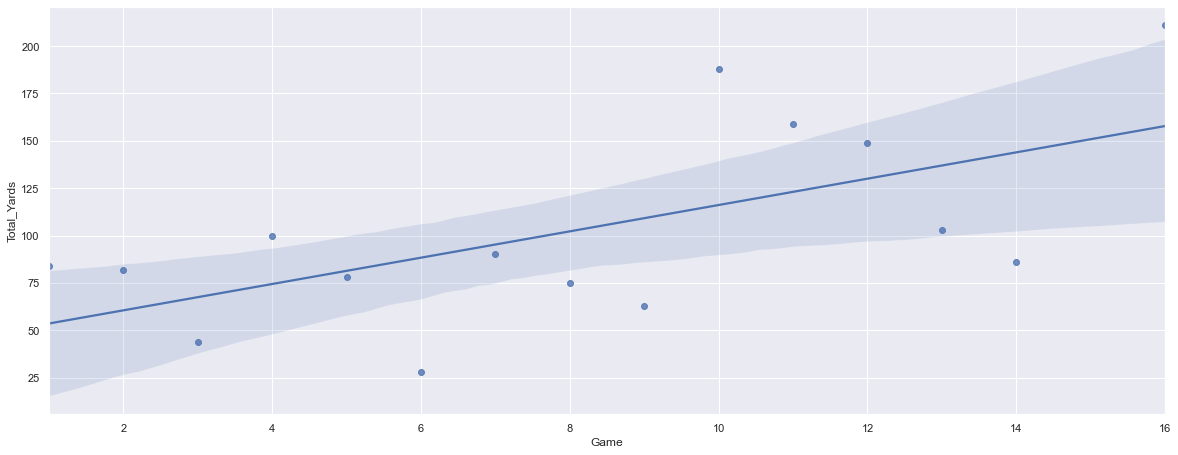

In [58]:
plt.figure(figsize = [20,7.5])
sns.regplot(data=derrick_henry_rb_2019, x="Game", y="Total_Yards")

In [8]:
# all_wide_receiver_stats = all_individual_stats(get_wide_receiver_df, df_all_wide_receivers_2019)
# all_wide_receiver_stats

In [9]:
# michael_thomas_wr_2019 = get_wide_receiver_df('/players/T/ThomMi05.htm')
# michael_thomas_wr_2019.to_pickle("./michael_thomas_wr_2019.pkl")

# Pickling
michael_thomas_wr_2019 = pd.read_pickle("./michael_thomas_wr_2019.pkl")
michael_thomas_wr_2019

,Name,Date,Game,Week,Team,Opp,Result,Targets,Receptions,Total_Yards,Yards/Reception,Touchdowns,Catch%
0,Michael Thomas,2019-09-09,1,1,NOR,HOU,W 30-28,13,10,123,12.30,0,76.9%
1,Michael Thomas,2019-09-15,2,2,NOR,LAR,L 9-27,13,10,89,8.90,0,76.9%
2,Michael Thomas,2019-09-22,3,3,NOR,SEA,W 33-27,7,5,54,10.80,1,71.4%
3,Michael Thomas,2019-09-29,4,4,NOR,DAL,W 12-10,9,9,95,10.56,0,100.0%
4,Michael Thomas,2019-10-06,5,5,NOR,TAM,W 31-24,13,11,182,16.55,2,84.6%
5,Michael Thomas,2019-10-13,6,6,NOR,JAX,W 13-6,12,8,89,11.13,0,66.7%
6,Michael Thomas,2019-10-20,7,7,NOR,CHI,W 36-25,11,9,131,14.56,0,81.8%
7,Michael Thomas,2019-10-27,8,8,NOR,ARI,W 31-9,11,11,112,10.18,1,100.0%
8,Michael Thomas,2019-11-10,9,10,NOR,ATL,L 9-26,14,13,152,11.69,0,92.9%
9,Michael Thomas,2019-11-17,10,11,NOR,TAM,W 34-17,10,8,114,14.25,1,80.0%


&lt;Figure size 1440x432 with 0 Axes&gt;

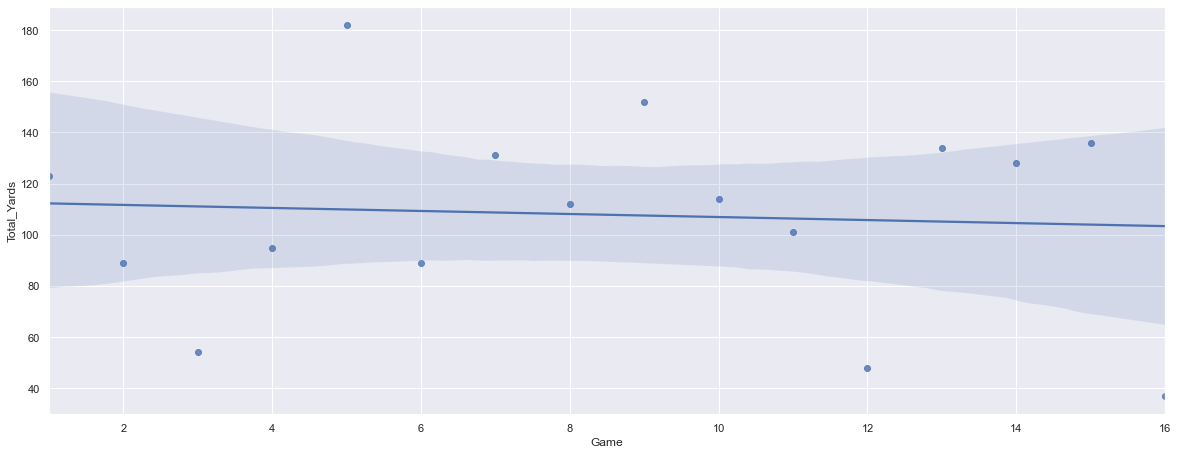

&lt;Figure size 1440x432 with 0 Axes&gt;

In [60]:
plt.figure(figsize = [20,7.5])
sns.regplot(data=michael_thomas_wr_2019, x="Game", y="Total_Yards")
plt.figure(figsize = [20,6])

In [70]:
patriots_2019 = get_defense_df('/teams/nwe/2019.htm')
patriots_2019 = patriots_2019.drop([9,17,18])
# patriots_2019.to_pickle("./patriots_2019.pkl")

# # Pickling
# patriots_2019 = pd.read_pickle("./patriots_2019.pkl")
patriots_2019['Game'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
patriots_2019

,Team,Day,Date,Opponent,Points,Opponent Score,1stDowns,Defense_Total_Yards,Defense_Pass_Yards,Defense_Rush_Yards,Turnovers,Game
0,New England Patriots,Sun,September 8,Pittsburgh Steelers,33,3,15,308.0,276.0,32.0,1,1
1,New England Patriots,Sun,September 15,Miami Dolphins,43,0,11,184.0,142.0,42.0,4,2
2,New England Patriots,Sun,September 22,New York Jets,30,14,6,105.0,69.0,36.0,1,3
3,New England Patriots,Sun,September 29,Buffalo Bills,16,10,23,375.0,240.0,135.0,4,4
4,New England Patriots,Sun,October 6,Washington Redskins,33,7,11,223.0,78.0,145.0,2,5
5,New England Patriots,Thu,October 10,New York Giants,35,14,10,213.0,161.0,52.0,4,6
6,New England Patriots,Mon,October 21,New York Jets,33,0,12,154.0,73.0,81.0,6,7
7,New England Patriots,Sun,October 27,Cleveland Browns,27,13,15,310.0,151.0,159.0,3,8
8,New England Patriots,Sun,November 3,Baltimore Ravens,20,37,26,372.0,162.0,210.0,2,9
10,New England Patriots,Sun,November 17,Philadelphia Eagles,17,10,21,255.0,174.0,81.0,1,10


&lt;AxesSubplot:xlabel=&#39;Game&#39;, ylabel=&#39;Defense_Rush_Yards&#39;&gt;

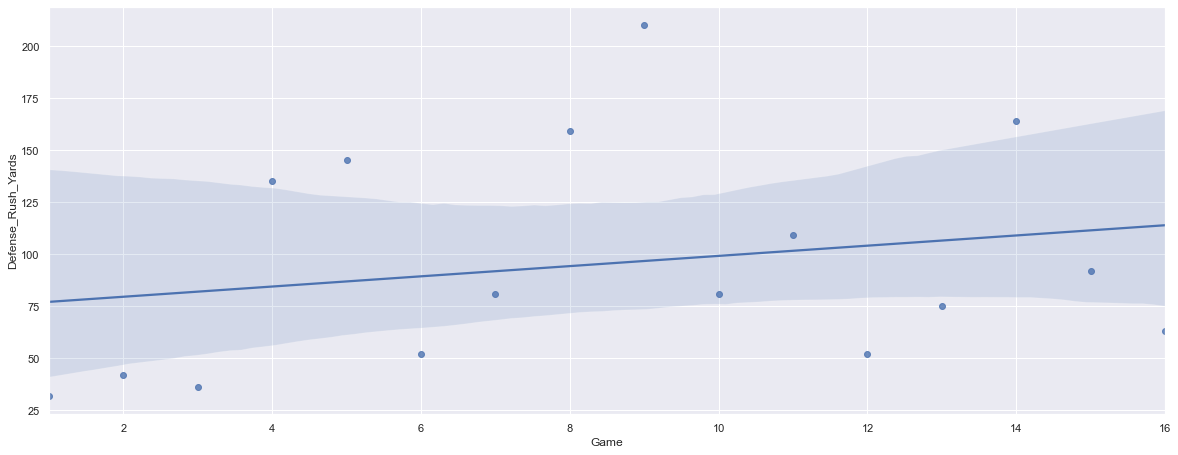

In [71]:
plt.figure(figsize = [20,7.5])
sns.regplot(data=patriots_2019, x="Game", y="Defense_Rush_Yards")